The idea of this notebook is to analyse how changes in heat capacity (Cp) and enthalpy (DH) affects the Gibbs free energy (DG) of unfolding. In particular, we will analyse the DG at 5C to see when there is cold denaturation. That way, we can understand when to discard a model based on its Cp and DH values.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
temperature_to_kelvin  = lambda T: T + 273.15 if np.max(T) < 270 else T

def DG_at_T(T,Tm, Cp0, DHm):

    """
    Calculates the DG at 5C.
    Parameters
    ----------
    T : float
        temperature to calculate DG at. In Kelvin or Celsius units.
    Tm : float
        temperature of melting where [N] = [U]. In Kelvin or Celsius units.
    Cp0 : float
        heat capacity change upon unfolding. In kcal/M
    DHm : float
        enthalpy change upon unfolding. In kcal/mol/K

    Returns
    -------
    DG : float
        Gibbs free energy at temperature T
    """

    T = temperature_to_kelvin(T)
    Tm = temperature_to_kelvin(Tm)

    DG = DHm * (1 - T / Tm) + Cp0 * (T - Tm - T * np.log(T / Tm))

    return DG

def folded_fraction(DG,T):
    """
    Calculates the folded fraction from DG.
    Parameters
    ----------
    DG : float
        Gibbs free energy in kcal/mol
    T : float
        temperature in Kelvin

    Returns
    -------
    fN : float
        folded fraction
    """
    R = 1.987 / 1000 # kcal/mol/K

    T = temperature_to_kelvin(T)

    K = np.exp(-DG / (R * T)) # at 5C
    fN = 1 / (1 + K)

    return fN

In [180]:
def plot_heatmap(x, y, z, ax=None, title=None, cmap='viridis'):

    # if an axis is provided, plot there, otherwise create a new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    pcm = ax.pcolormesh(x, y, z, cmap=cmap, shading='auto')
    # Use mathtext for delta symbols and subscripts
    ax.set_xlabel(r'$\Delta H$ (kcal/mol)')
    ax.set_ylabel(r'$\Delta C_p$ (kcal/mol/K)')
    if title:
        ax.set_title(title)

    return pcm


def plot_heatmaps_row(x, y, zs, titles=None, cmap='viridis'):
    """Plot multiple heatmaps in a single row (zs: list/tuple of 2D arrays).

    Returns the figure object.
    """
    n = len(zs)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6), squeeze=False)

    for i, (Z, ax) in enumerate(zip(zs, axes[0])):
        pcm = plot_heatmap(x, y, Z, ax=ax, title=(titles[i] if titles else None), cmap=cmap)
        cb = fig.colorbar(pcm, ax=ax)
        # label colorbar if provided title mentions DG or folded fraction
        #if titles and 'DG' in titles[i]:
        #    cb.set_label('DG at 5°C (kcal/mol)')
        #elif titles and 'Folded' in titles[i]:
        #    cb.set_label('Folded fraction at 5°C')

    plt.tight_layout()
    plt.show()

In [181]:
DH_array = np.linspace(20, 400, 1000)
Cp_array = np.linspace(0.5, 4, 1000)

# Create dataframe combining all DH and Cp values
DH_mesh, Cp_mesh = np.meshgrid(DH_array, Cp_array)


def create_dg_df(Tm,T = 5):

    """
    Given a certain melting temperature, evaluate how DG at T, changes with DH and Cp.

    Parameters
    ---------
    Tm : float
        temperature of melting where [N] = [U]. In Kelvin or Celsius units.

    Returns
    -------
    pd.DataFrame
        Dataframe with columns: DH, Cp, DG_5C and fN_5C.
    """

    df_mesh = pd.DataFrame({
        'DH': DH_mesh.ravel(),
        'Cp': Cp_mesh.ravel()
    })

    df_mesh['DG_5C'] = DG_at_T(
        T,
        Tm,
        Cp0=df_mesh['Cp'].values,
        DHm=df_mesh['DH'].values
    )

    df_mesh['fN_5C'] = folded_fraction(df_mesh['DG_5C'].values, T)

    return df_mesh

def plot_df_mesh(df_mesh,Tm):

    plot_heatmaps_row(
        DH_mesh,
        Cp_mesh,
        [
            df_mesh['DG_5C'].values.reshape(DH_mesh.shape),
            df_mesh['fN_5C'].values.reshape(DH_mesh.shape),
        ],
        titles=[
            f'T$_m$ = {Tm}°C.  ΔG at 5°C',
            f'T$_m$ = {Tm}°C.  Folded fraction at 5°C',
        ],
    )


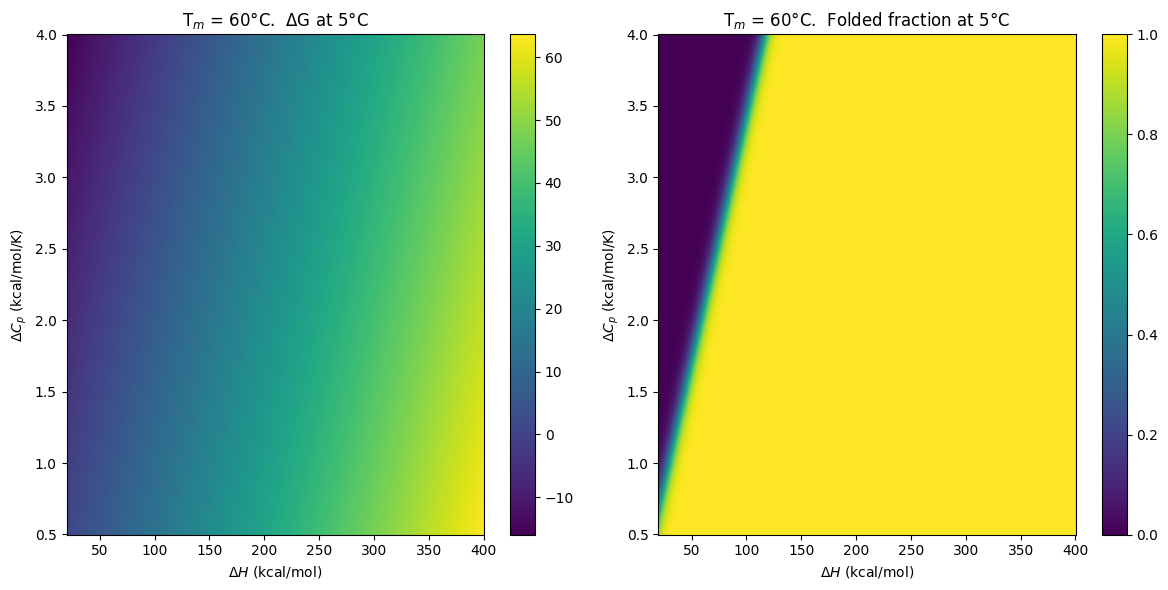

In [182]:
df_mesh_Tm_60 = create_dg_df(60)
plot_df_mesh(df_mesh_Tm_60,60)

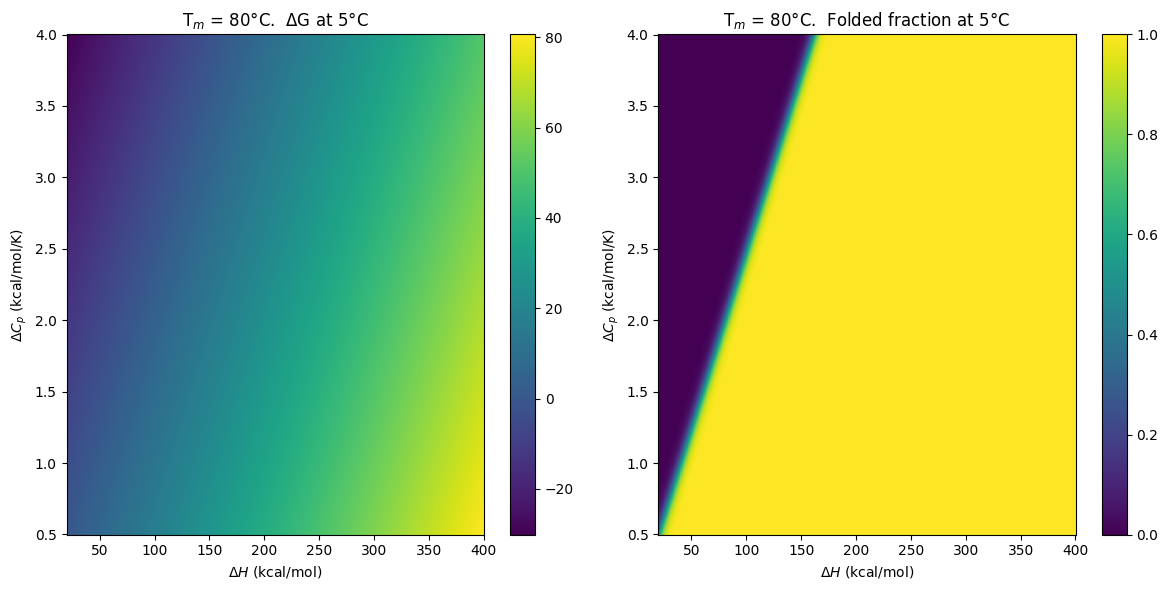

In [183]:
df_mesh_Tm_80 = create_dg_df(80)
plot_df_mesh(df_mesh_Tm_80,80)

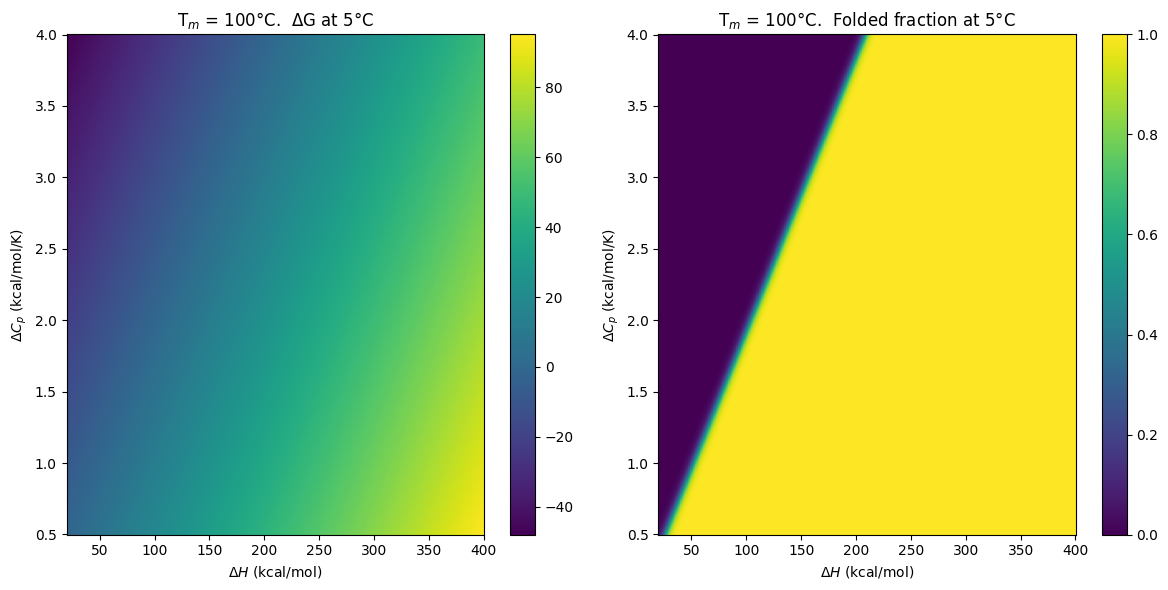

In [184]:
df_mesh_Tm_100 = create_dg_df(100)
plot_df_mesh(df_mesh_Tm_100,100)

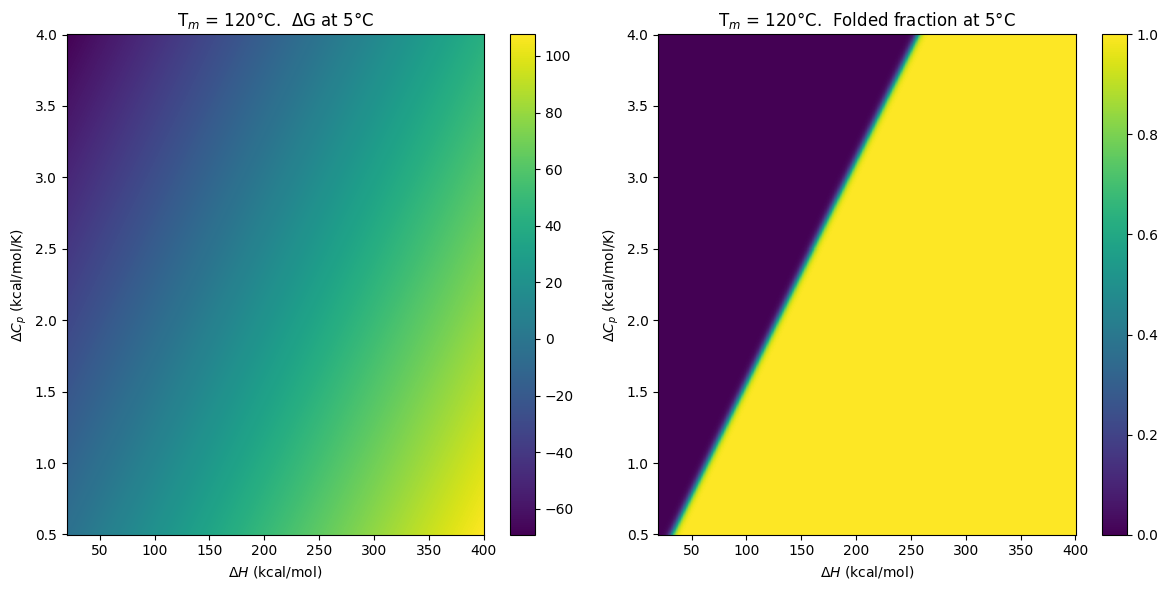

In [185]:
df_mesh_Tm_120 = create_dg_df(120)
plot_df_mesh(df_mesh_Tm_120,120)

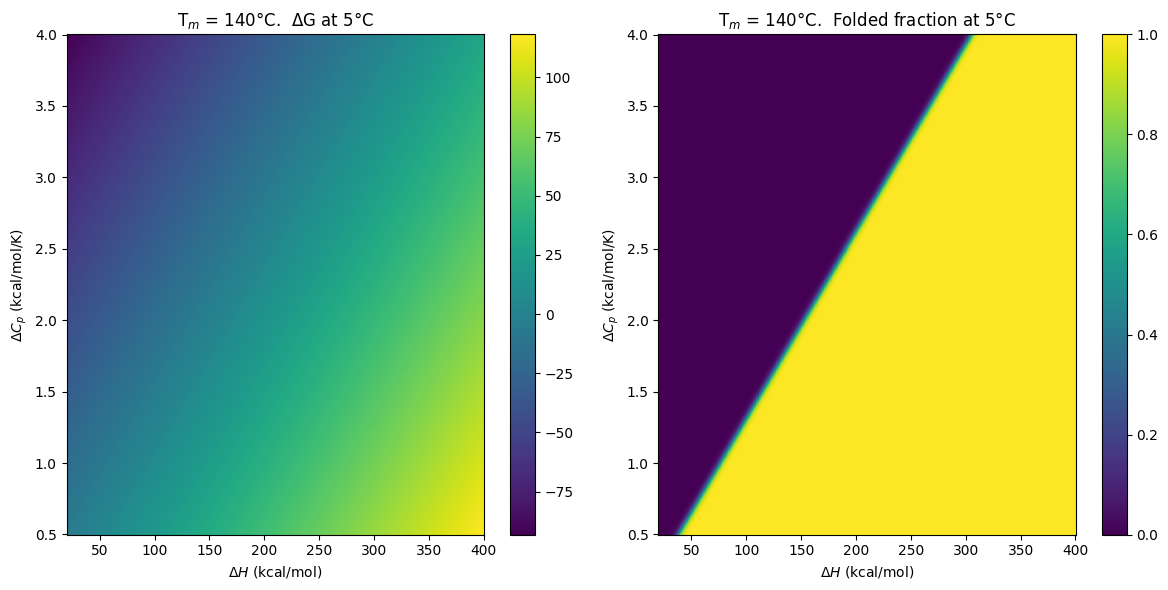

In [186]:
df_mesh_Tm_140 = create_dg_df(140)
plot_df_mesh(df_mesh_Tm_140,140)